## 훈련 세트와 테스트 세트
### 이번 공부 목적
- 지도 학습과 비지도 학습의 차이를 배워보자.
- 모델을 훈련시키는 훈련 세트와 모델을 평가하는 테스트 세트로 데터를 나눠서 학습해보자.

### 1. 지도 학습과 비지도 학습 
- 지도 학습(supervised learning): **입력 데이터(데이터)**와 **타깃(정답)**이 있는 상태 즉 **훈련 데이터**가 있는 상태에서 타깃(정답)을 맞추는 학습을 하는 형식 

<img src="image/supervise_learning_1.jpeg" height="30%" width="30%"/> 

- 비지도 학습(unsupervised learning): 알고리즘 타깃(정답) 없이 입력 데이터만 사용하는 형식, 정답을 사용하지 않아 무언가를 맞출 수는 없지만, **데이터를 잘 파악하거나, 변형시키는데 도움을 줌**.

### 2. 훈련 세트와 테스트 세트
- 머신러닝 알고리즘의 성능을 제대로 평가하려면 훈련 데이터와 평가에 사용할 데이터가 각각 달라야 한다.
- 가장 간단한 방법은 평가를 위해 또 다른 데이터를 준비하거나 이미 준비된 데이터 중에서 일부를 떼어 내어 확용하는 것이다. (일반적으로 후자의 경우를 많이 사용함)
- 평가에 사용하는 데이터를 **테스트 데이터(test set)**, 훈련에 사용되는 데이터를 **훈련 세트(training set)** 이라고 한다.

### 실전 코드 
- chapter1에서 사용한 도미와 빙어 데이터를 하나로 합쳐 리스트로 준비 

#### 데이터 준비

In [1]:
# 데이터 준비 
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5,
               32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0,
               35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 
               11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0,
               500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 
               620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0,
               975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 
               19.7, 19.9]

In [2]:
# 각 생선의 길이와 무게를 하나의 리스트로 담을 2차원 리스트 만들기
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

- 하나의 생선 데이터를 샘플(sample)이라고 부른다. 도미와 빙어는 각각 35마리, 14마리가 있으므로 전체 데이터는 49개의 샘플이 있다.
- 사용하는 특성은 길이와 무게 2개 이다.
- 처음 35개를 훈련 세트로, 나머지 14개를 테스트 세트로 사용.

In [3]:
# 패키지 불러오기 & KNeighborsClassifier 선언 
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

#### 인덱싱과 슬라이싱 
- 배열의 위치를 하나만 지정 - 인덱싱 
- 인덱스의 범위를 지정 - 슬라이싱 

In [4]:
# 배열의 위치인 인덱스를 지정 - fish_data의 다섯 번째 샘플을 출력
print(fish_data[4])

[29.0, 430.0]


In [5]:
# 첫 번째 부터 다섯 번째까지의 샘플을 선택 - 슬라이싱
print(fish_data[0:5])  # 혹은 print(fish_data[:5])로도 사용 가능 

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [6]:
# 44번째 부터 끝까지의 샘플 선택 - 슬라이싱
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


#### 훈련 세트, 테스트 세트 분리 
- 인덱스 0 ~ 34까지 처음 35개 샘픙를 훈련 세트로 선택, 인덱스 35 ~ 48까지 나머지 14개 샘플을 테스트 세트로 선택 

In [7]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용 
train_input = fish_data[:35]

In [8]:
# 훈련 세트로 타깃값 중 0부터 34번쨰 인덱스까지 사용 
train_target = fish_target[:35]

In [9]:
# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]

In [10]:
# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용 
test_target = fish_target[35:]

#### 모델 훈련 및 평가 

In [11]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

- 앞에 chapter 1와 평가가 다르게 나옴, 정확도는 0.0 즉 0%로 나왔다. 
- 어떤 문제가 있을 것으로 판단 해당 사항을 알아보고자 한다.

### 3. 샘플링 편향 

- 위의 train set와 test set이 골고류 분류되지 않았다. 
- 결론적으로 도미 35개의 데이터를 trian, 빙어의 14개의 데이터를 test로 분류 하였다. 원래라면 골고루 데이터가 섞여 있어야한다.
- 이처럼 일반적으로 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 **샘플링 편향(sampling bias)** 라고 부른다.
- 훈련 세트와 테스트 세트를 나누기 전에 데이터를 섞든지 아니면 골고루 샘플을 뽑아서 훈련 세트와 테스트 세트를 만들어야 한다. 이런 작업을 간편하게 처리할 수 있도록 파이썬 라이브러리인 **넘파이** 대해 알아보고자 한다.

### 4. 넘파이 
- 넘파이(Numpy)는 파이썬의 대표적인 배열(array) 라이브러리 이다.
- 넘파이는 고차원의 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구들을 많이 제공함.
- 1차원 배열은 선이고, 2차원 배열은 면, 3차원 배열은 3차원 공간을 나타낸다.

<img src="image/numpy.jpeg" height="50%" width="50%"/>

- 보통의 xy 좌표계와는 달리 시작점이 왼쪽 아래가 아니고 왼쪽 위에서부터 시작

#### 패키지 불러오기 & 배열 변환  

In [12]:
# 패키지 임포트 
import numpy as np

In [13]:
# 파이썬 리스트를 넘파이 배열로 바꾸기는 매우 쉬움 -> 넘파이 array() 함수에 파이썬 리스트를 전달 
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [14]:
# input 배열 출력 
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


- 넘파이는 친절하게 배열의 차원을 구분하기 쉽도록 행과 열을 가지런히 출력 함.

In [15]:
# shape: 배열의 크기를 알려줌 -> 이 명령을 사용하면 (샘플 수, 특성 수)를 출력함.
print(input_arr.shape)

(49, 2)


- 데이터를 넘파이 배열로 준비 완료, 이제 랜덤하게 샘플을 선택해 훈련 세트와 테스트 세트로 만들기
- 주의 할 점은 input_arr와 target_arr에서 같은 위치는 함께 선택해야 됨.(예를 들어 input_arr의 두 번째 값은 훈련 세트로 target_arr의 두 번째 값은 테스트 세트로 가면 안됨)
- 훈련 세트와 테스트 세트로 나눌 인덱스값을 잘 기억해야 함.

#### 데이터 랜덤하게 섞기 

In [16]:
# 일정한 결과를 얻기위해 초기에 랜덤시드를 지정 
np.random.seed(42)   # 랜덤시드 지정
index = np.arange(49)  # 0부터 48까지의 인덱스 만들기 (arange 함수 사용)
np.random.shuffle(index)  # 랜덤하게 섞기 

In [17]:
# 인덱스 출력 
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [18]:
# 배열 인댁싱으로 input_arr의 두 번째와 네 번째 샘플을 선택 
print(input_arr[[1, 3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


#### 섞인 데이터로 다시 훈련 세트와 타깃 세트를 분류하기 

In [19]:
# 35개로 train set 만들기 
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [20]:
# 첫 번째 인텍스 값 비교 확인
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [21]:
# 나머지 14개로 test set 만들기 
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

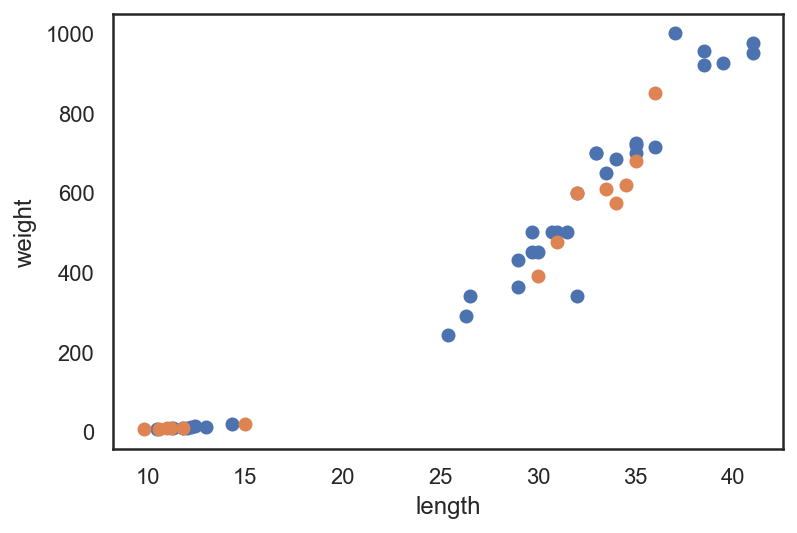

In [22]:
# 훈련 세트와 테스트 세트에 도미와 빙어가 잘 섞여 있는지 산점도로 나타내가
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])  # 2차원 배열은 행과 열 인덱스를 콤마로 나누어 지정, 각각의 특성을 분리하여 출력 
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 파란색이 훈련 세트, 주황색이 테스트 세트 이다. 도미와 빙어 모두 골고루 섞여있음을 확인 

### 5. 두 번째 머신러닝 프로그램 
- 앞서 만든 훈련 세트와 테스트 세트로 K-최근접 이웃 모델을 훈련시키기 - .fit() 매서드 실행 

#### 모델 훈련 

In [23]:
# 다시 모델 훈련하기 - train 데이터
kn = kn.fit(train_input, train_target)

#### 모델 훈련 후 정확도 측정

In [24]:
# 모델 훈련 후 정확도 측정 
kn.score(test_input, test_target)

1.0

- 100% 정확도가 나옴.

#### 예측 결과와 실제 타깃 확인하기 

In [25]:
# 예측 결과
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [26]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

- 테스트 세트에 대한 예측 결과가 정답과 일치

### 문제 해결 과정 및 결론 
- 문제 해결 과정 
    - chapter 1의 모델 평가 방식이 이상다는 의견을 제기
    - 모델을 훈련할 때 사용하는 데이터로 모델의 성능을 평가하는 것은 정답을 미리 알려주고 시험을 보는 것과 같음, 공정하게 점수를 매기지 않기 위해서는 훈련에 참여하지 않은 샘플을 이용해야 한다고 판단.
    - 훈련 데이터를 훈련 세트와 테스트 세트로 나눔 (훈련 세트는 모델 훈련을, 테스트 세트는 모델을 평가를)
    - 하지만 테스트 세트를 무작정 나누어선 안됨, 도미와 빙어를 분류하는 것이 목적이므로 훈련 세트나 테스트 세트에 어느 한 생선만 들어가면 올바른 학습이 이루어지기 힘듬.
    - 골고루 데이터를 섞기 위해 넘파이 라이브러리에 shuffle 함수를 사용. 배열의 인덱스를 섞어 다시 모델을 훈련시킴
- 결과 
    - 테스트 세트에서 100% 정확도를 달성함